In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os

In [16]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Automatic mask generation
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [14]:
!pip show opencv-python
%reset

Name: opencv-python
Version: 4.8.0.76
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: data-gradients, dopamine-rl, imgaug
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
!pip install super-gradients
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [20]:
image = cv2.imread('OIP.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

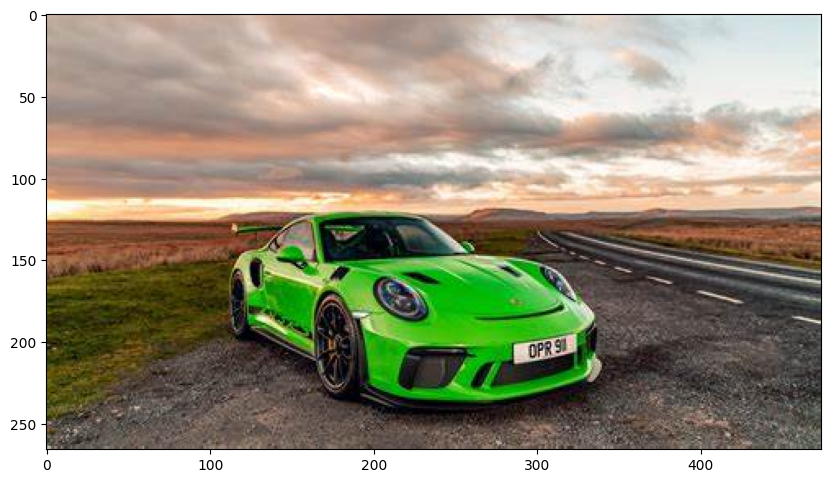

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [22]:
from super_gradients.training import models
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

The console stream is logged into /root/sg_logs/console.log


[2024-02-06 12:11:09] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-02-06 12:11:09] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-02-06 12:11:10] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-02-06 12:11:20] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-06 12:11:20] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-06 12:11:20] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-02-06 12:11:20] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-02-06 12:11:20] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-02-06 12:11:20] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-02-06 12:11:20] WARNING - env_sanity_check.py - 

[2024-02-06 12:11:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


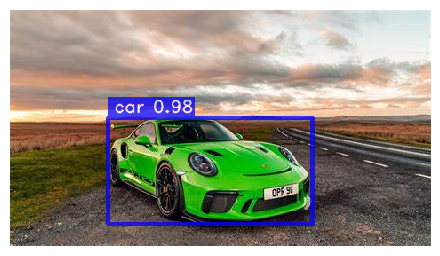

In [23]:
yolo_nas_l.predict(image, conf=0.25).show()

In [24]:
conf_threshold = 0.25
detection_pred = yolo_nas_l.predict(image, conf = conf_threshold)
detection = detection_pred.save('output.jpeg')

[2024-02-06 12:11:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [25]:
!pip install -U torch  ultralytics

import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [27]:
from segment_anything import sam_model_registry, SamPredictor
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [28]:
predictor.set_image(image)
masks = mask_generator.generate(image)

In [29]:
print(len(masks))
print(masks[0].keys())

50
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [30]:
print(masks[0]['segmentation'].shape)
for mask in masks:
    mask['segmentation'] = mask['segmentation']

(266, 474)


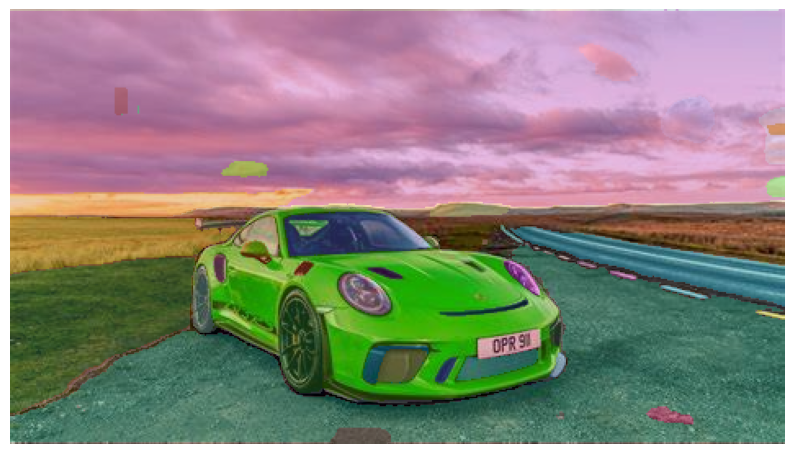

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [32]:
from super_gradients.training import models

model_nas = models.get("yolo_nas_l", pretrained_weights="coco")
conf_threshold = 0.25

[2024-02-06 12:16:03] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-02-06 12:16:04] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [33]:
model_pred = model_nas.predict(image, conf = conf_threshold)

[2024-02-06 12:16:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [34]:
bboxes_xyxy = model_pred.prediction.bboxes_xyxy.tolist()
confidence = model_pred.prediction.confidence.tolist()
labels = model_pred.prediction.labels.tolist()

In [35]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
masks = mask_generator.generate(image)

In [36]:
predictor.set_image(image)

In [37]:
input_box = np.array(bboxes_xyxy[0])

In [38]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box = input_box[None, : ],
    multimask_output=False,
)

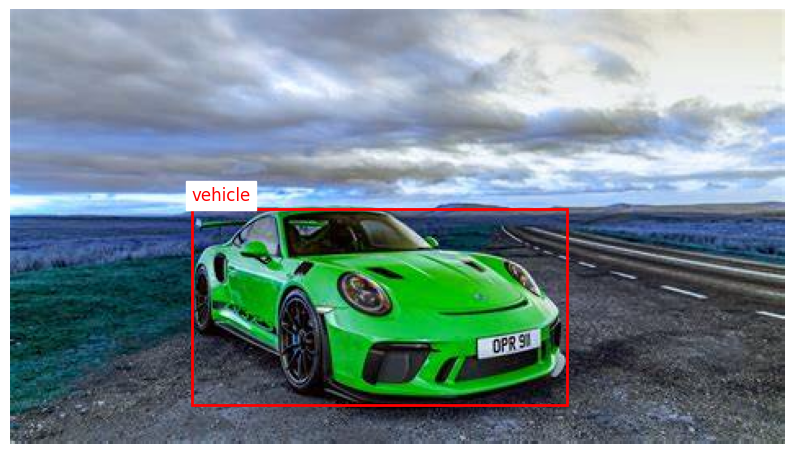

In [41]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

if labels[0] == 0:
  plt.imshow(masks[0], alpha = 0.5)
plt.gca().add_patch(plt.Rectangle((input_box[0],input_box[1]), input_box[2] - input_box[0], input_box[3] - input_box[1],
                                   linewidth = 2, edgecolor = 'r', facecolor='none'))

plt.text(input_box[0], input_box[1] - 5, 'vehicle', fontsize=12, color='r',backgroundcolor='w')
plt.axis('off')
plt.savefig('OIP.jpg')
plt.show()